# MultiLayer Perceptron

In this notebook, I will just implement a MLP that is a good starting point for Deep Learning and I will study DL in another study project.

MultiLayer Perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks.

## Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

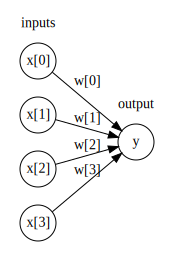

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

The formula of linear regression is:
$$
\hat{y} = w[0] \cdot x[0] + w[1] \cdot x[1] + \ldots + w[n] \cdot x[n] + b
$$

- Each node of the first layer represents a feature of the input data.
- Each edge represents a weight (learned parameter).
- The node of the final layer represents the output (weighted sum of the features).

MLP computes a set of weighted sums repeatedly, where each set of weighted sums is computed by a different node in the hidden layer.

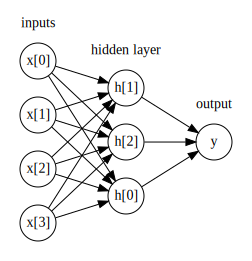

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Computing a series of weighted sums is mathematically the same as computing a single weighted sum that linear model does.

## Activation Functions

After computing a weighted sum for each hidden unit, a nonlinear function is applied to the result.

- Rectified Linear Unit (ReLU):
$$
f(x) = \max(0, x)
$$

- Tangens Hyperbolicus (tanh):
$$
f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

- Sigmoid:
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

and so on.

These nonlinear functions allows the neural network to learn complex patterns in the data than linear models could.

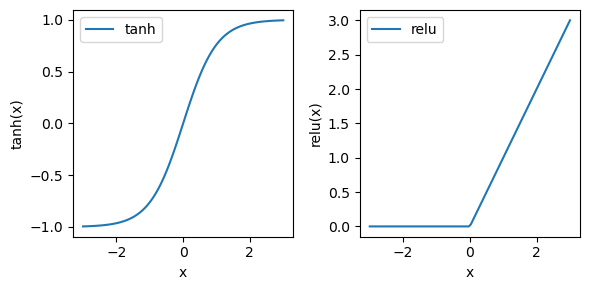

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))

line = np.linspace(-3, 3, 100)

# Plot tanh function
ax1.plot(line, np.tanh(line), label="tanh")
ax1.legend(loc="best")
ax1.set_xlabel("x")
ax1.set_ylabel("tanh(x)")

# Plot relu function
ax2.plot(line, np.maximum(line, 0), label="relu")
ax2.legend(loc="best")
ax2.set_xlabel("x")
ax2.set_ylabel("relu(x)")

plt.tight_layout()
plt.show()


## Implementation


Text(0, 0.5, 'Feature 1')

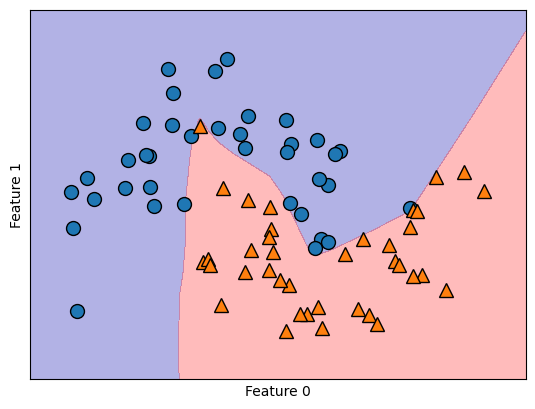

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

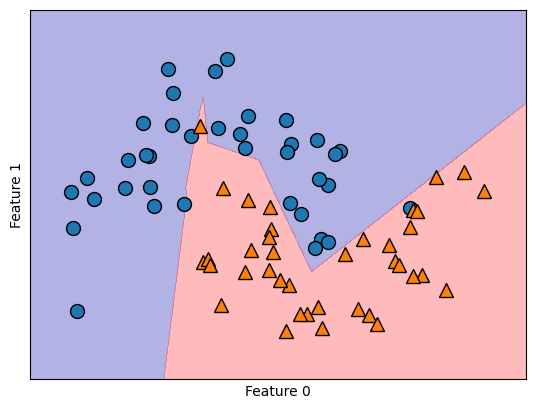

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- Construct with 10 hidden units.

With a single hidden layer and a ReLU activation function, the decision function will be 10 straight lines.

Text(0, 0.5, 'Feature 1')

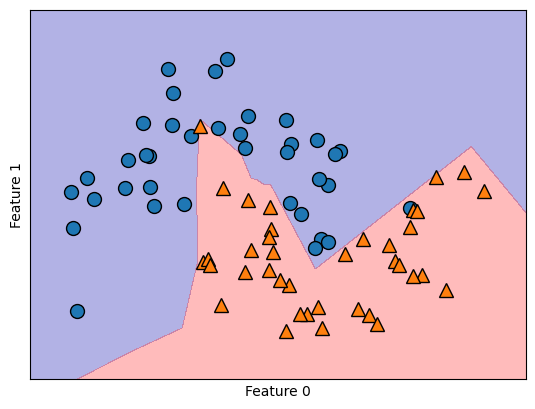

In [11]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

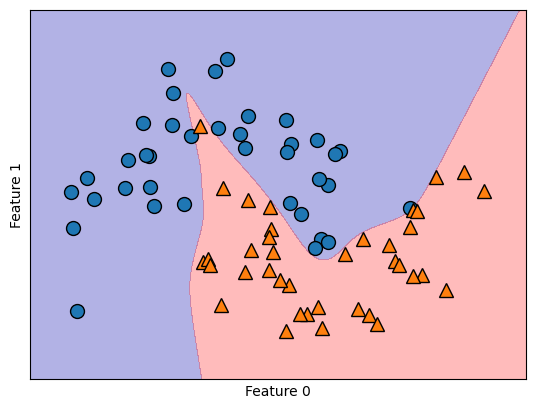

In [13]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Can also control the complexity of a neural network by using regularization techniques.

`alpha` parameter in `MLPClassifier` and `MLPRegressor` is the regularization parameter.

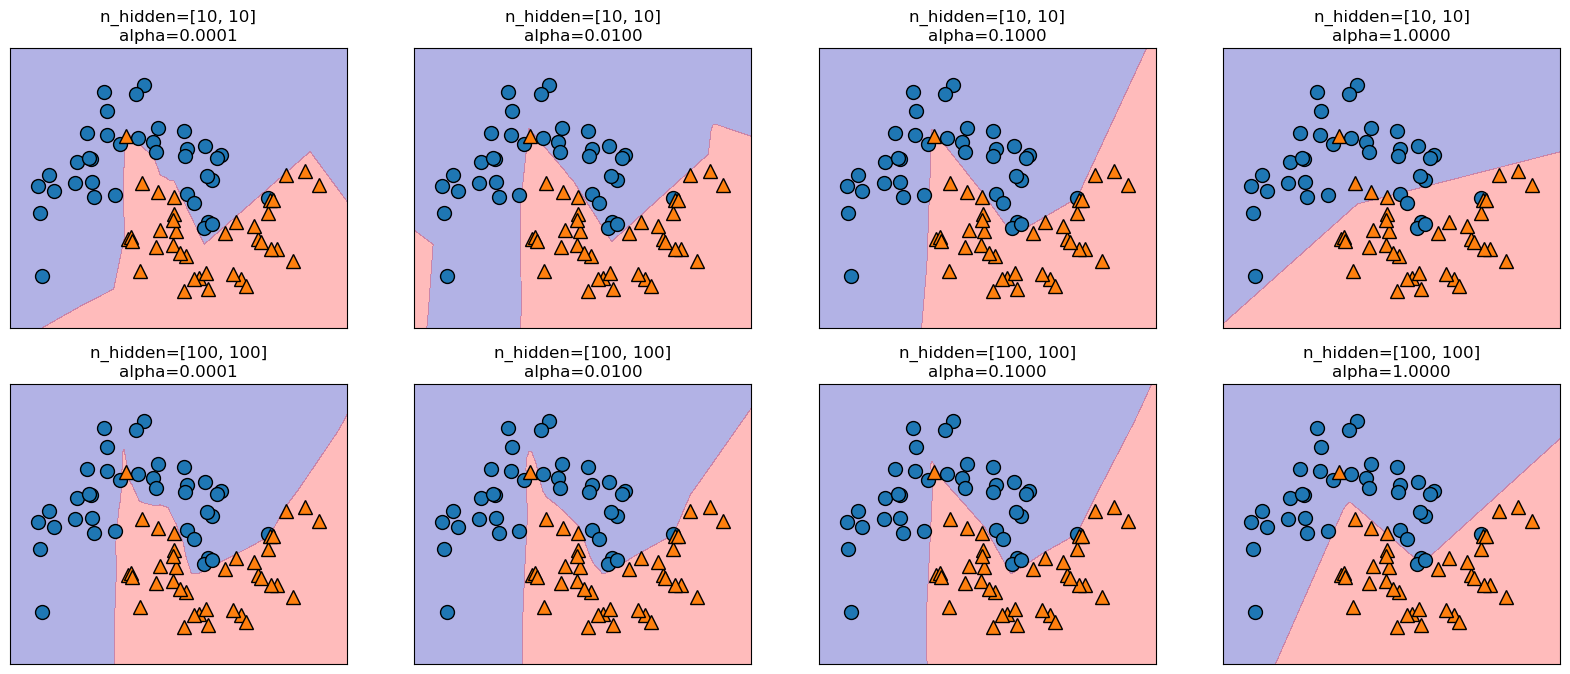

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha, max_iter=1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

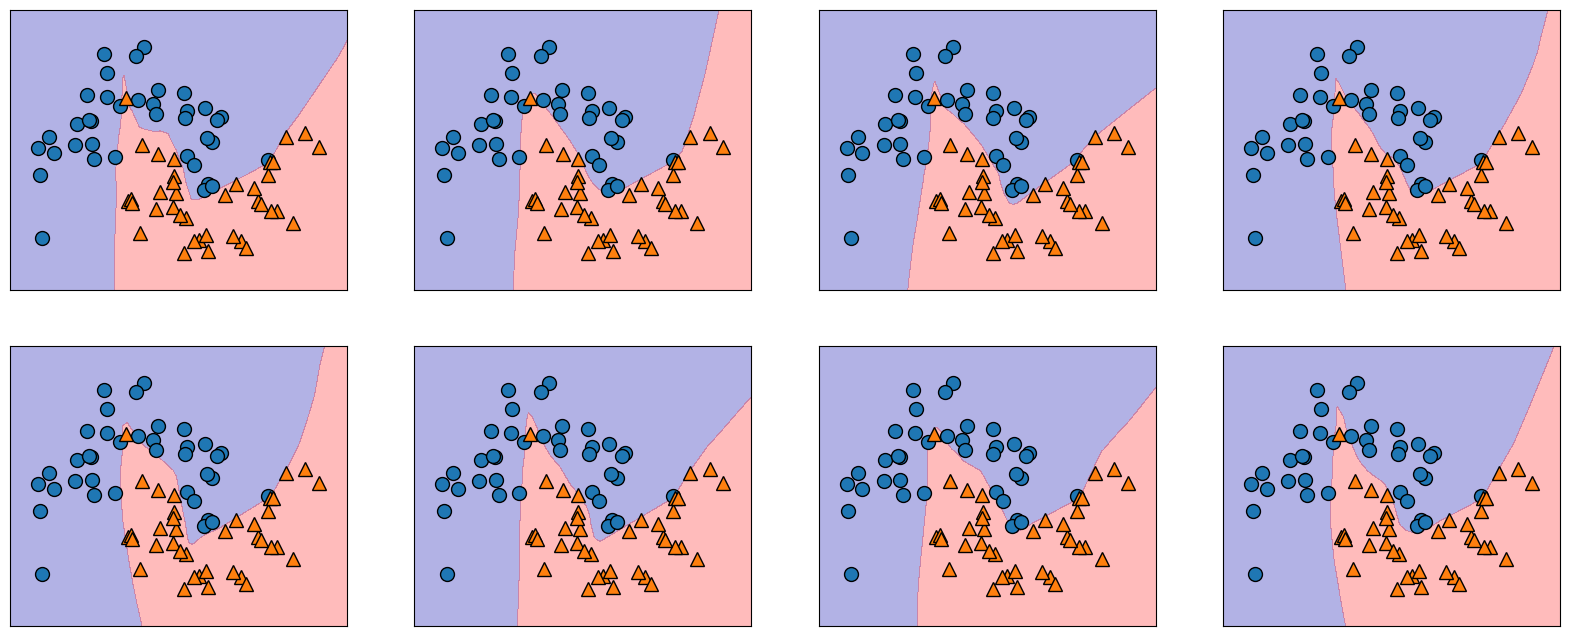

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

**Random Initialization**
- The weights are randomly initialized before fitting the model.
- The random initialization affects the model that is learned even with the same parameters.

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


- Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1.

In [24]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [26]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


## Analyzing Coefficients

One way to understand what a neural network has learned is to look at the weights of the model.

- The weights in `mlp.coefs_` are of shape `(n_layers, )`.
- Each entry in the `mlp.coefs_` list is a weight matrix.

The weight matrix has the shape `(n_neurons_in, n_neurons_out)`.
- The entry `w[i, j]` shows the weight of the connection between the `i`-th input neuron and the `j`-th hidden neuron.

Light colors represent large positive values, and dark colors represent large negative values.

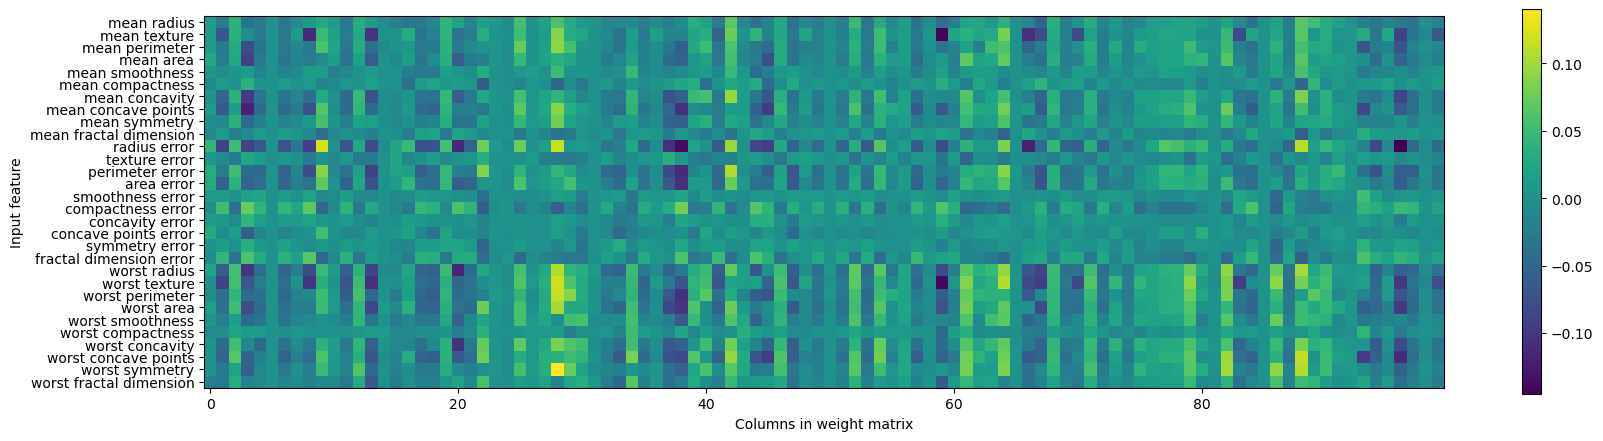

In [27]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Pros and Cons

**Pros**
- Are able to capture information in large datasets.
- Can learn incredibly complex models.
- With enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks).

**Cons**
- Take a long time to train.
- Require careful preprocessing of the data.
- Require careful tuning of the parameters.
- Are hard to understand.
- Are hard to debug.